### Analyse results for large online networks

In [18]:
from lib import *
import pandas as pd
import seaborn as sns

In [19]:
all_online_networks = pd.read_csv(DATA_DIR_PATH / "online_social_networks.csv")
all_online_networks.head(2)

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,douban,douban,154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3460300,large
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22528,small


In [20]:
df = pd.read_csv(RESULT_DIR_PATH / "structural_measures_large_online.csv")
df = df.merge(all_online_networks, on="name") # merge with properties from netzschleuder

In [21]:
df.agg(["mean", "std"]) # get means and std deviations

/var/folders/9p/yqgvxz3x5fv5wdy31vscjm4r0000gn/T/ipykernel_66722/3772742719.py:1: FutureWarning: ['name', 'group', 'kind', 'mode', 'node_properties', 'edge_properties', 'nodes_qcut'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(["mean", "std"]) # get means and std deviations


,_,idx,dataset,n_nodes,frac_total,density,dbar,dcv,dmax,null_10_sim_g,...,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,gml_file_size
mean,0.0,1.0,NaN,12131.484848,0.991962,0.030829,137.699041,1.294749,1452.666667,0.149287,...,331044.939394,137.947576,161.536061,325.719394,167.634242,-0.071818,0.241212,7.606061,0.992121,1.462092e+06
std,0.0,0.0,NaN,31038.660625,0.030982,0.020399,91.587621,0.389124,794.853590,0.085537,...,197452.174017,91.145480,98.562789,185.818251,551.314365,0.126106,0.100024,4.904968,0.030696,9.382191e+05


In [22]:
df.columns

Index(['_', 'idx', 'dataset', 'name', 'n_nodes', 'frac_total', 'density',
       'dbar', 'dcv', 'dmax', 'null_10_sim_g', 'null_10_sim', 'null_10_sim_e',
       'null_10_comp_g', 'null_10_comp', 'null_10_comp_e', 'data_sim_g',
       'data_sim', 'data_sim_e', 'data_comp_g', 'data_comp', 'data_comp_e',
       'group', 'nodes', 'edges', 'avg_degree', 'std_dev_degree',
       'largest_eigenvalue_hashimoto', 'random_walk_mixing_time',
       'degree_assortativity', 'global_clustering', 'diameter',
       'relative_size_of_largest_component', 'kind', 'mode', 'node_properties',
       'edge_properties', 'gml_file_size', 'nodes_qcut'],
      dtype='object')

In [23]:
df.head(3)

,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,dmax,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,0,1,NaN,NYC_restaurant_tips,5372,0.838066,0.000614,3.295607,1.569503,196,...,-0.04,0.00,19,0.84,Undirected,Bipartite,is_user name tags,tip_text,531456,large
1,0,1,NaN,NYC_restaurant_checkin,4906,0.993922,0.001118,5.485936,1.044863,88,...,0.30,0.00,13,0.99,Undirected,Bipartite,is_user name tags,NaN,223232,large
2,0,1,NaN,douban,154908,1.000000,0.000027,4.223952,2.781348,287,...,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3460300,large


Visualise Correlation matrix


In [24]:
def plot_correlation_matrix(df, title):
    plt.figure(figsize=(8, 8))
    plt.title(title)
    mask = np.triu(np.ones_like(df, dtype=bool))
    sns.heatmap(df, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
    plt.show()

In [25]:
len(df.index)

33

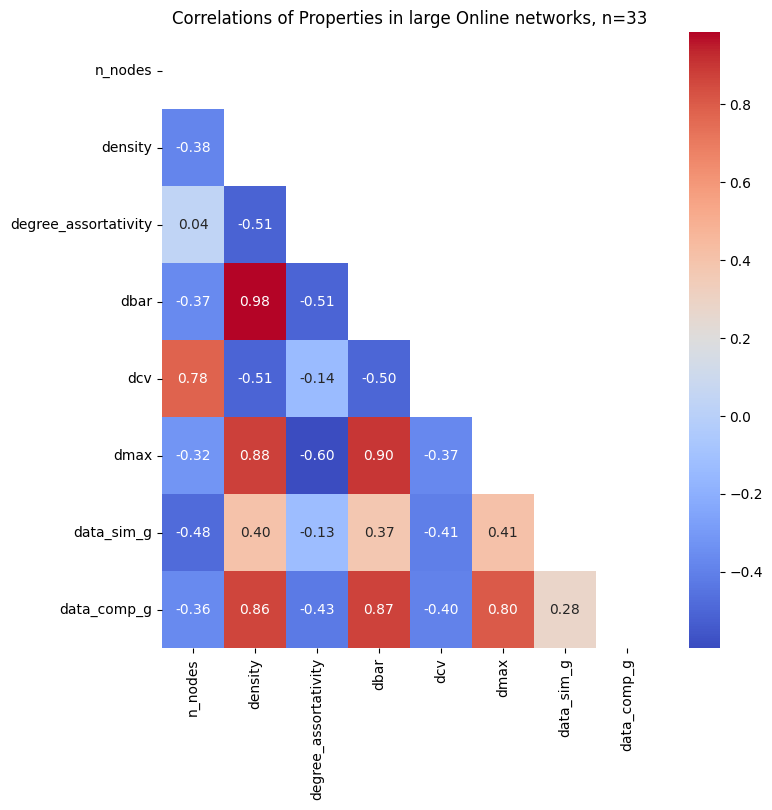

In [26]:
plot_correlation_matrix(df[["n_nodes", "density", "degree_assortativity", "dbar", "dcv", "dmax", "data_sim_g", "data_comp_g"]].corr(), "Correlations of Properties in large Online networks, n=33")

Text(0.5, 1.0, 'Global Similarity of Large Online Networks, data vs. null model')

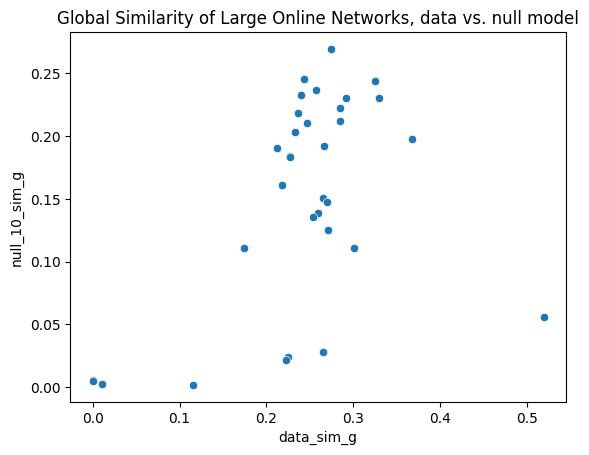

In [30]:
sns.scatterplot(data=df, x="data_sim_g", y="null_10_sim_g")
plt.title("Global Similarity of Large Online Networks, data vs. null model")

Text(0.5, 1.0, 'Global Complementarity of Large Online Networks, data vs. null model')

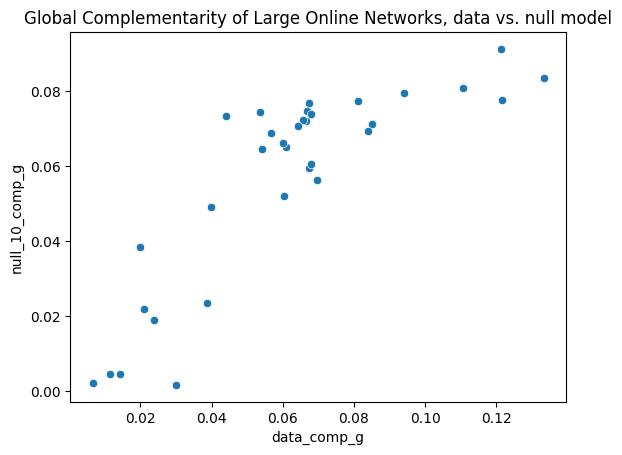

In [31]:
sns.scatterplot(data=df, x="data_comp_g", y="null_10_comp_g")
plt.title("Global Complementarity of Large Online Networks, data vs. null model")

/Users/af/miniforge3/envs/nsp/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global Complementarity vs Global Similarity of large Online Networks')

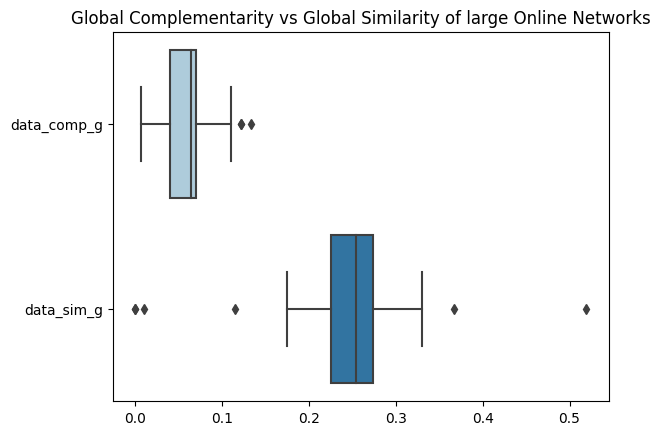

In [12]:
sns.boxplot(data=df[["data_comp_g", "data_sim_g"]], orient="h", palette="Paired")
plt.title("Global Complementarity vs Global Similarity of large Online Networks")

In [15]:
df[df["data_sim_g"] < df["data_comp_g"]] # only in the bipartite networks the complementarity was higher

,_,idx,dataset,name,n_nodes,frac_total,density,dbar,dcv,dmax,...,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,0,1,NaN,NYC_restaurant_tips,5372,0.838066,0.000614,3.295607,1.569503,196,...,-0.04,0.0,19,0.84,Undirected,Bipartite,is_user name tags,tip_text,531456,large
1,0,1,NaN,NYC_restaurant_checkin,4906,0.993922,0.001118,5.485936,1.044863,88,...,0.30,0.0,13,0.99,Undirected,Bipartite,is_user name tags,NaN,223232,large


/Users/af/miniforge3/envs/nsp/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.5, 1.0, 'Global complementarity and global similarity of large online networks, null models')

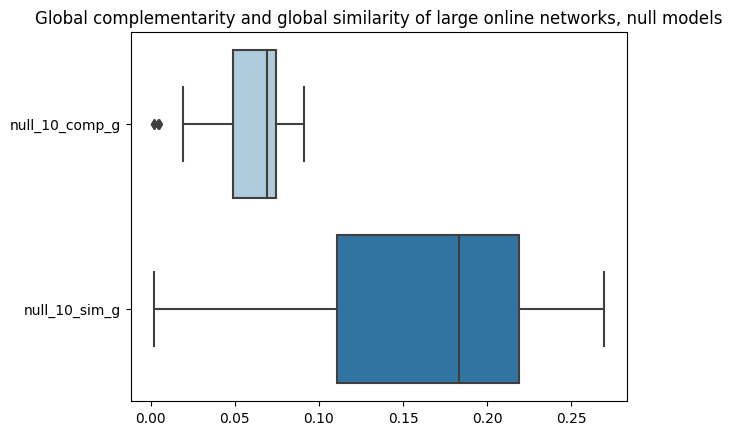

In [16]:
sns.boxplot(data=df[["null_10_comp_g", "null_10_sim_g"]], orient="h", palette="Paired")
plt.title("Global complementarity and global similarity of large online networks, null models")

Text(0, 0.5, 'Density')

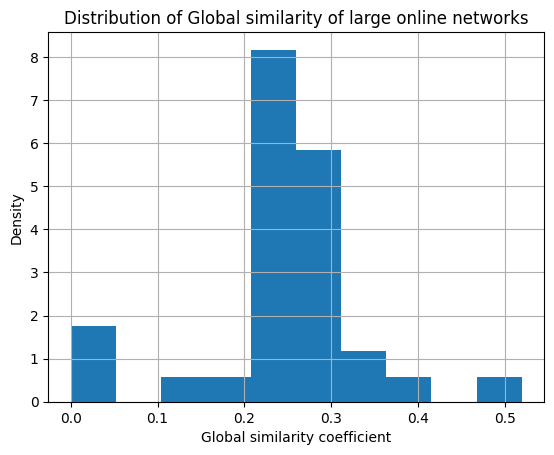

In [32]:
df["data_sim_g"].hist(density=True, bins=10)
plt.title("Distribution of Global similarity of large online networks")
plt.xlabel("Global similarity coefficient")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

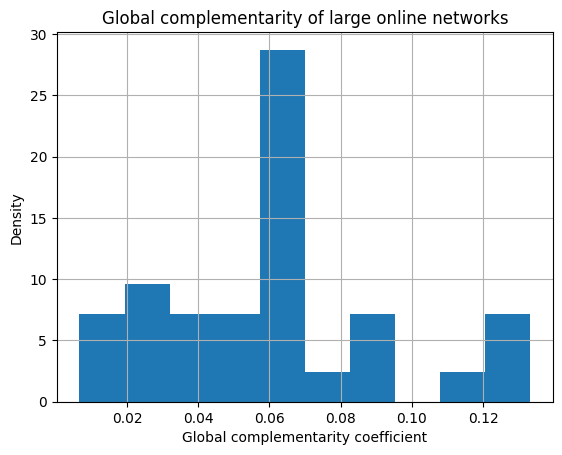

In [33]:
df["data_comp_g"].hist(density=True, bins=10)
plt.title("Global complementarity of large online networks")
plt.xlabel("Global complementarity coefficient")
plt.ylabel("Density")